In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
%run project.py

In [4]:
num_meters = 96
input_dim = num_meters
hidden_dim = 24
batch_dim = 1
output_dim = 96 * 4
num_layers = 4
learning_rate = 0.01
num_epochs = 100

In [5]:
ami = pd.read_csv('./data/ami-uniq.txt', sep='\t')
ami['datetime'] = pd.to_datetime(ami['datetime'], format='%Y-%m-%d %H:%M:%S')
#weather = pd.read_csv('./data/WeatherData_Zipcode_77088.csv')
#weather = weather.drop(columns=['LocalDateTime', 'TimeZone'])

In [6]:
#ami.loc[ami['id']==81].plot(y='kw', figsize=(30,6))

In [7]:
series_kw = ami.pivot(index='id', columns='datetime', values='kw')

In [8]:
#series_kw.count().unique()

In [9]:
t_0 = series_kw.loc[:,series_kw.count() > 82].columns[0]
t_f = series_kw.loc[:,series_kw.count() > 82].columns[-1]
kw_part = series_kw.loc[:,t_0:t_f].fillna(0)
kw_x_norm = kw_part / (kw_part.max().max() - kw_part.min().min())
kw_sum = kw_part.sum() / kw_part.count() * num_meters
kw_y_norm = kw_sum / (kw_sum.max() - kw_sum.min())

In [10]:
#kw_y_norm.plot(figsize=(100,5))

In [11]:
X_train = torch.tensor(kw_x_norm.transpose().values).float()
X_train = X_train.view([-1, 1, input_dim])
y_train = torch.tensor(kw_y_norm).float()
y_train = y_train.unfold(0, 96*4, 1)
#y_train.size()

In [12]:
model = AmiTest(input_dim, hidden_dim, batch_dim, output_dim, num_layers)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
hist = np.zeros(num_epochs)

In [13]:
model.hidden = model.init_hidden()

In [14]:
for t in range(num_epochs):
    model.hidden = model.init_hidden()
    y_pred = model(X_train)
    loss = loss_fn(y_pred[0:y_train.size(0),0], y_train)
    if t % 1 == 0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch  0 MSE:  832789.4375
Epoch  1 MSE:  746503.5
Epoch  2 MSE:  639031.25
Epoch  3 MSE:  487013.3125
Epoch  4 MSE:  366609.21875
Epoch  5 MSE:  329212.28125
Epoch  6 MSE:  248138.03125
Epoch  7 MSE:  200016.90625
Epoch  8 MSE:  186053.3125
Epoch  9 MSE:  177693.0
Epoch  10 MSE:  171600.6875
Epoch  11 MSE:  173084.09375
Epoch  12 MSE:  177809.5
Epoch  13 MSE:  177938.0625
Epoch  14 MSE:  174162.890625
Epoch  15 MSE:  170756.546875
Epoch  16 MSE:  169120.78125
Epoch  17 MSE:  168010.109375
Epoch  18 MSE:  166067.265625
Epoch  19 MSE:  163146.875
Epoch  20 MSE:  160113.703125
Epoch  21 MSE:  157854.15625
Epoch  22 MSE:  156123.796875
Epoch  23 MSE:  153328.859375
Epoch  24 MSE:  148388.25
Epoch  25 MSE:  142987.703125
Epoch  26 MSE:  141875.03125
Epoch  27 MSE:  135476.640625
Epoch  28 MSE:  134062.96875
Epoch  29 MSE:  135676.515625
Epoch  30 MSE:  134398.015625
Epoch  31 MSE:  130723.5703125
Epoch  32 MSE:  125620.9296875
Epoch  33 MSE:  127109.6875
Epoch  34 MSE:  126957.6328125
Epoc

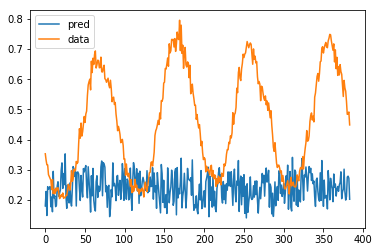

In [15]:
t = 0
plt.plot(y_pred[0:y_train.size(0),0][t].detach().numpy(), label="pred")
plt.plot(y_train[t].detach().numpy(), label="data")
plt.legend()
plt.show()

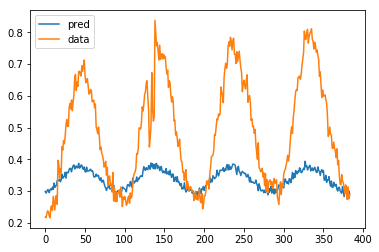

In [18]:
t = 3384
plt.plot(y_pred[0:y_train.size(0),0][t].detach().numpy(), label="pred")
plt.plot(y_train[t].detach().numpy(), label="data")
plt.legend()
plt.show()

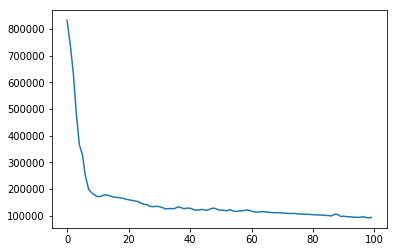

In [17]:
plt.plot(hist)